In [211]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv("GlobalLandTemperaturesByCity.csv")
data

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
...,...,...,...,...,...,...,...
8599207,2013-05-01,11.464,0.236,Zwolle,Netherlands,52.24N,5.26E
8599208,2013-06-01,15.043,0.261,Zwolle,Netherlands,52.24N,5.26E
8599209,2013-07-01,18.775,0.193,Zwolle,Netherlands,52.24N,5.26E
8599210,2013-08-01,18.025,0.298,Zwolle,Netherlands,52.24N,5.26E


In [212]:
data.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


In [213]:
data.tail()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
8599207,2013-05-01,11.464,0.236,Zwolle,Netherlands,52.24N,5.26E
8599208,2013-06-01,15.043,0.261,Zwolle,Netherlands,52.24N,5.26E
8599209,2013-07-01,18.775,0.193,Zwolle,Netherlands,52.24N,5.26E
8599210,2013-08-01,18.025,0.298,Zwolle,Netherlands,52.24N,5.26E
8599211,2013-09-01,NaN,NaN,Zwolle,Netherlands,52.24N,5.26E


In [214]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8599212 entries, 0 to 8599211
Data columns (total 7 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   dt                             object 
 1   AverageTemperature             float64
 2   AverageTemperatureUncertainty  float64
 3   City                           object 
 4   Country                        object 
 5   Latitude                       object 
 6   Longitude                      object 
dtypes: float64(2), object(5)
memory usage: 459.2+ MB


In [215]:
data.columns

Index(['dt', 'AverageTemperature', 'AverageTemperatureUncertainty', 'City',
       'Country', 'Latitude', 'Longitude'],
      dtype='object')

In [216]:
data.describe()

,AverageTemperature,AverageTemperatureUncertainty
count,8.235082e+06,8.235082e+06
mean,1.672743e+01,1.028575e+00
std,1.035344e+01,1.129733e+00
min,-4.270400e+01,3.400000e-02
25%,1.029900e+01,3.370000e-01
50%,1.883100e+01,5.910000e-01
75%,2.521000e+01,1.349000e+00
max,3.965100e+01,1.539600e+01


In [217]:
data.isnull().sum()

dt                                    0
AverageTemperature               364130
AverageTemperatureUncertainty    364130
City                                  0
Country                               0
Latitude                              0
Longitude                             0
dtype: int64

In [218]:
data = data.dropna()

In [219]:
data.isnull().sum()

dt                               0
AverageTemperature               0
AverageTemperatureUncertainty    0
City                             0
Country                          0
Latitude                         0
Longitude                        0
dtype: int64

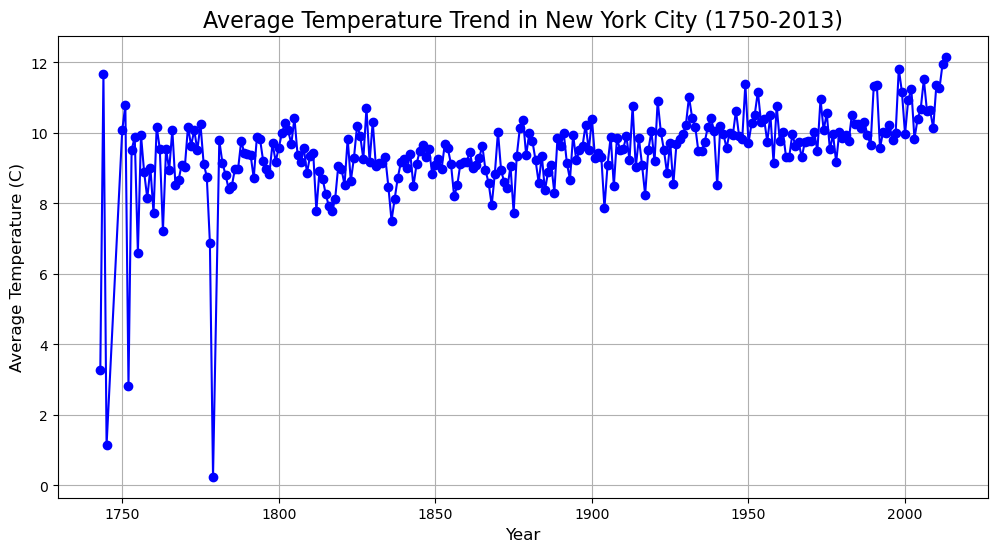

In [220]:
city_data = data[data['City'] == 'New York'].copy()
city_data['dt'] = pd.to_datetime(city_data['dt'], errors='coerce')
city_data['Year'] = city_data['dt'].dt.year
annual_avg_temp = city_data.groupby('Year')['AverageTemperature'].mean().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(annual_avg_temp['Year'], annual_avg_temp['AverageTemperature'], linestyle='-', color='blue', marker='o')
plt.title('Average Temperature Trend in New York City (1750-2013)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Temperature (C)', fontsize=12)
plt.grid(True)
plt.show()

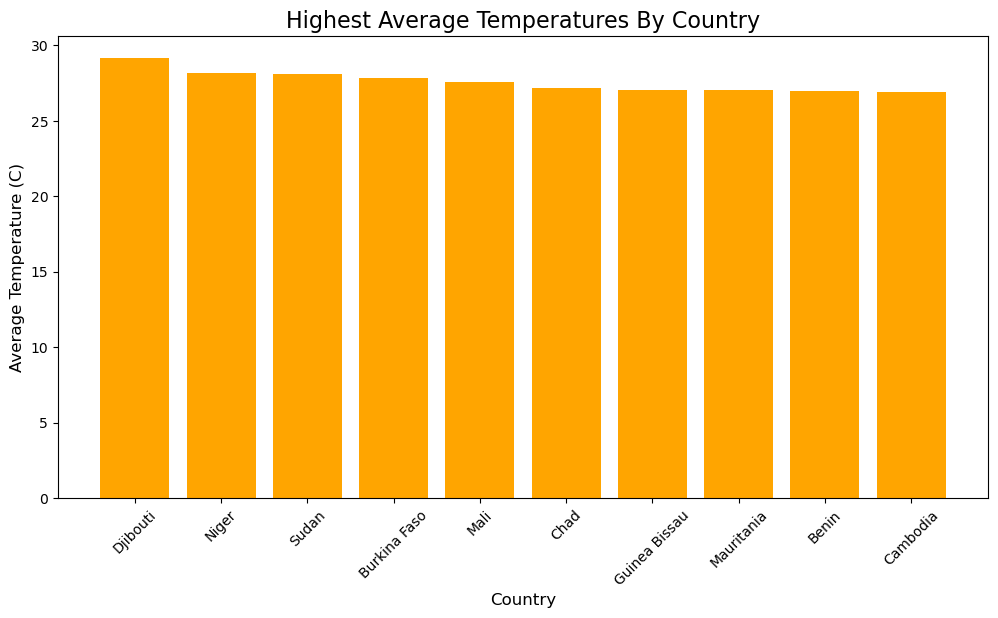

In [221]:
country_avg_temp = data.groupby('Country')['AverageTemperature'].mean().reset_index()
top_countries = country_avg_temp.sort_values(by='AverageTemperature',ascending=False).head(10)

plt.figure(figsize=(12,6))
plt.bar(top_countries['Country'],top_countries['AverageTemperature'], color='orange')
plt.title('Highest Average Temperatures By Country', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Average Temperature (C)', fontsize=12)
plt.xticks(rotation=45)
plt.show()

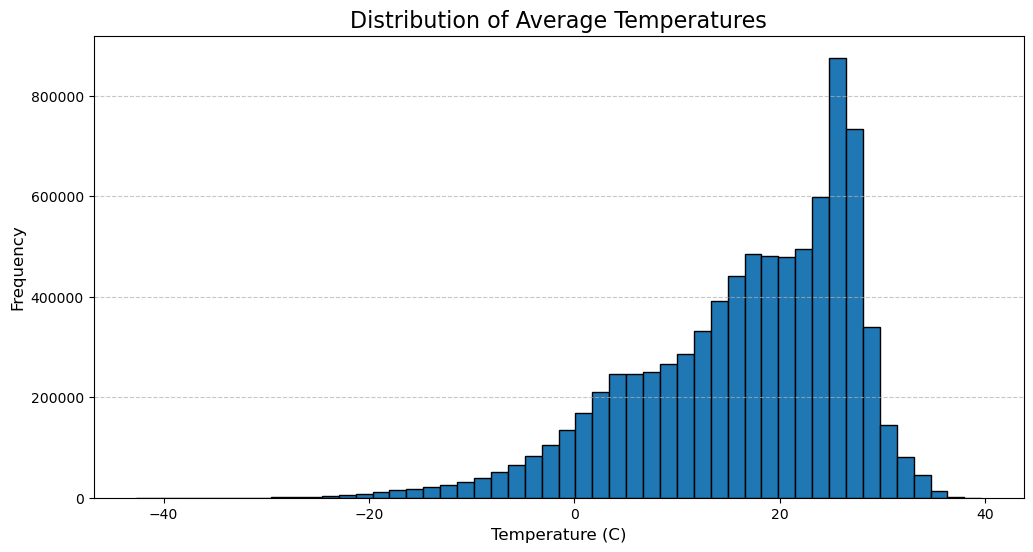

In [222]:
temperature_data = data['AverageTemperature']

plt.figure(figsize=(12, 6))
plt.hist(temperature_data, bins=50, edgecolor='black')
plt.title('Distribution of Average Temperatures', fontsize=16)
plt.xlabel('Temperature (C)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

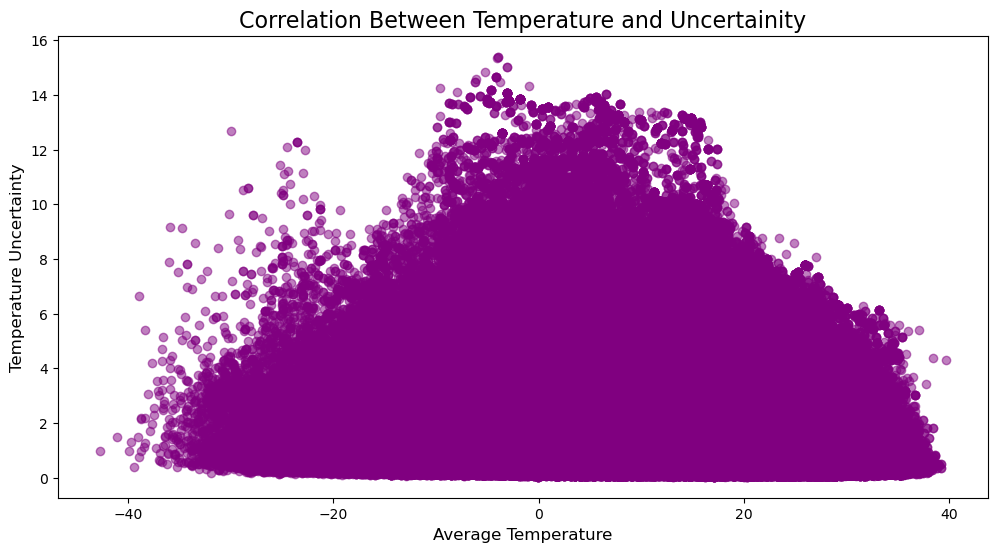

In [223]:
scatter_data = data[['AverageTemperature', 'AverageTemperatureUncertainty']].dropna()

plt.figure(figsize=(12,6))
plt.scatter(scatter_data['AverageTemperature'], scatter_data['AverageTemperatureUncertainty'], alpha=0.5, color='purple')
plt.title("Correlation Between Temperature and Uncertainity", fontsize=16)
plt.xlabel("Average Temperature", fontsize=12)
plt.ylabel("Temperature Uncertainty", fontsize=12)
plt.show()

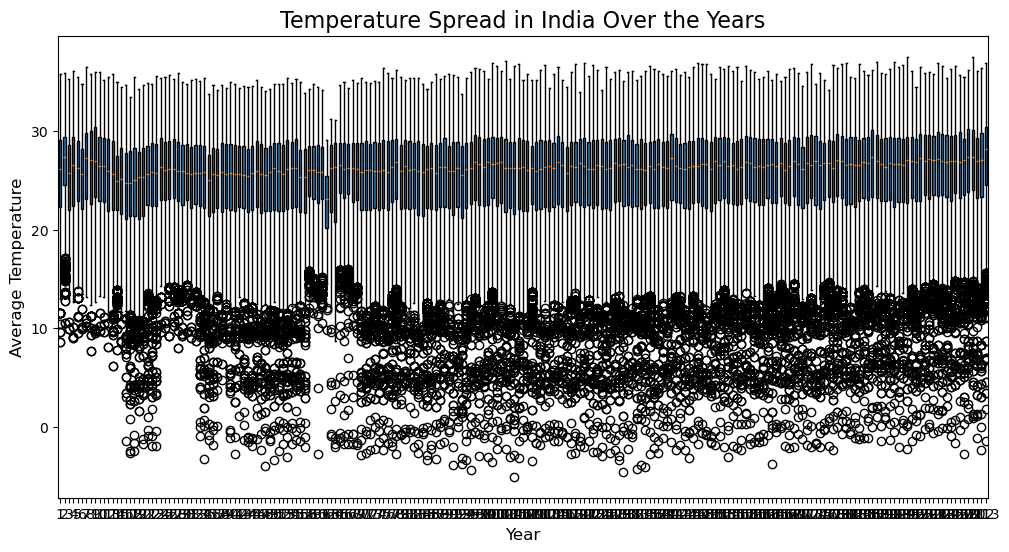

In [224]:
country_data = data[data['Country'] == 'India'].copy()
country_data['dt'] = pd.to_datetime(country_data['dt'], errors='coerce')
country_data = country_data.dropna(subset=['dt'])
country_data['Year'] = country_data['dt'].dt.year
country_data = country_data[['Year', 'AverageTemperature']].dropna()
grouped_data = [group['AverageTemperature'] for _, group in country_data.groupby('Year')]

plt.figure(figsize=(12,6))
plt.boxplot(grouped_data, showfliers=True, patch_artist=True)
plt.title('Temperature Spread in India Over the Years', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Temperature', fontsize=12)
plt.show()